In [1]:
import scripts.proj1_helpers as helper
import implementations as imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

boson is -1

not boson is 1

In [2]:
y_train, x_train, ids_train = helper.load_csv_data('train.csv')
y_test, x_test, ids_test = helper.load_csv_data('test.csv')
print(x_train.shape)
print(x_test.shape)

(250000, 30)
(568238, 30)


In [3]:
print('Number of boson:', np.count_nonzero(y_train-1))
print('Number of other:', np.count_nonzero(y_train+1))

Number of boson: 164333
Number of other: 85667


In [4]:
def col_standardize(x):
    means = [np.mean(col) for col in x.T]
    stds = [np.std(col) for col in x.T]
    return (x - means) / stds

In [5]:
def standardize(x):
    return (x - np.mean(x, axis=0)) / np.std(x, axis=0)

In [6]:
std_x_train = standardize(x_train)
std_x_test = standardize(x_test)

In [7]:
col_std_x_train = col_standardize(x_train)
col_std_x_test = col_standardize(x_test)

In [8]:
y_train[y_train < 0] = 0

In [37]:
l, w, data = imp.stochastic_logistic_regression(y_train, std_x_train, max_iter=25000, batch_size=150, threshold=10**(-4))

Current iteration=1, the loss=103.9720770839918
Current iteration=2, the loss=98.29625478320199
Current iteration=3, the loss=97.31771300537916
Current iteration=4, the loss=88.40615271800243
Current iteration=5, the loss=101.50329841169668
Current iteration=6, the loss=89.44701549601467
Current iteration=7, the loss=97.35057941519068
Current iteration=8, the loss=95.31007013952737
Current iteration=9, the loss=88.21783028234296
Current iteration=10, the loss=92.46359429542717
Current iteration=11, the loss=98.07013206913088
Current iteration=12, the loss=90.12062195126488
Current iteration=13, the loss=94.3216217123457
Current iteration=14, the loss=91.02698343194518
Current iteration=15, the loss=91.07405057064125
Current iteration=16, the loss=91.3213211894993
Current iteration=17, the loss=86.11160998669253
Current iteration=18, the loss=90.13806569567646
Current iteration=19, the loss=85.55535934902909
Current iteration=20, the loss=85.56915112322616
Current iteration=21, the loss

Current iteration=518, the loss=66.03159230336894
Current iteration=519, the loss=70.92316965655382
Current iteration=520, the loss=74.17092694864174
Current iteration=521, the loss=83.16223081586581
Current iteration=522, the loss=70.92043998599212
Current iteration=523, the loss=71.29863527303436
Current iteration=524, the loss=79.85098855379466
Current iteration=525, the loss=82.41469348562737
Current iteration=526, the loss=70.53275436181698
Current iteration=527, the loss=82.64959075988638
Current iteration=528, the loss=60.277082231479056
Current iteration=529, the loss=71.9507293670072
Current iteration=530, the loss=91.99573074512695
Current iteration=531, the loss=68.84024079093496
Current iteration=532, the loss=72.91035400836313
Current iteration=533, the loss=74.98539254948335
Current iteration=534, the loss=73.79219718058144
Current iteration=535, the loss=73.64502861686586
Current iteration=536, the loss=76.13678817211587
Current iteration=537, the loss=70.22637751556942


Current iteration=1016, the loss=72.42970344825915
Current iteration=1017, the loss=74.9356209820235
Current iteration=1018, the loss=90.32918484857177
Current iteration=1019, the loss=65.64229161188456
Current iteration=1020, the loss=71.81907738012669
Current iteration=1021, the loss=86.90750754318421
Current iteration=1022, the loss=71.8606479951358
Current iteration=1023, the loss=65.96735991324194
Current iteration=1024, the loss=67.13817523926542
Current iteration=1025, the loss=76.98657143761321
Current iteration=1026, the loss=69.41152549417995
Current iteration=1027, the loss=75.59271893620641
Current iteration=1028, the loss=73.80914428859941
Current iteration=1029, the loss=75.18635231823032
Current iteration=1030, the loss=86.38495429561667
Current iteration=1031, the loss=72.5752449751799
Current iteration=1032, the loss=66.59290911353646
Current iteration=1033, the loss=75.55744552932735
Current iteration=1034, the loss=63.865689070651946
Current iteration=1035, the loss=

Current iteration=1536, the loss=70.67884770778258
Current iteration=1537, the loss=74.14504265419637
Current iteration=1538, the loss=89.53835108216015
Current iteration=1539, the loss=72.35721540930021
Current iteration=1540, the loss=73.34278147540907
Current iteration=1541, the loss=78.35076215162971
Current iteration=1542, the loss=74.57375761367092
Current iteration=1543, the loss=69.49957172313003
Current iteration=1544, the loss=77.96967938769856
Current iteration=1545, the loss=77.58773823540783
Current iteration=1546, the loss=65.4346153325553
Current iteration=1547, the loss=76.06271719910987
Current iteration=1548, the loss=81.58881856741587
Current iteration=1549, the loss=80.77789731595782
Current iteration=1550, the loss=79.75792277155325
Current iteration=1551, the loss=67.74513044854804
Current iteration=1552, the loss=64.77466554031196
Current iteration=1553, the loss=81.04150642372764
Current iteration=1554, the loss=72.99868879335756
Current iteration=1555, the loss

In [38]:
len(data)

1668

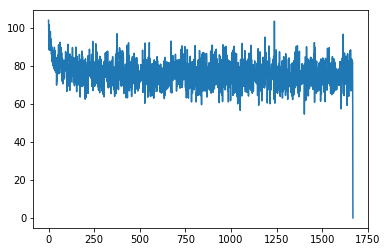

In [39]:
plt.plot(data)

### Raw least squares (score: ?)

In [ ]:
(w, loss) = imp.least_squares(y_train, x_train)
loss

### Std least squares (score: 0.73)

In [ ]:
(w, loss) = imp.least_squares(y_train, col_std_x_train)
loss

In [ ]:
(w, loss) = imp.least_squares(y_train, std_x_train)
loss

### Logistic regression

In [ ]:
def add_1_column(mat):
    return np.hstack((np.ones((mat.shape[0], 1)), mat))

In [ ]:
def compute_loss(y, tx, w):                                                        
    """Computes loss using log-likelihood"""                                
    txw = tx @ w                                                            
    return np.sum(np.log(1 + np.exp(txw)) - y @ txw.T)          

In [ ]:
imp.cross_validation_v2(y_train, col_std_x_train, 2, f, degree=1, compute_loss=compute_loss)

### Eigenvalues reduction (score: 0.62)

In [ ]:
a = np.matrix([[1,2],[3,4]])
np.tile(a, 2)

In [ ]:
std_x_train = standardize(x_train)

In [ ]:
u, s, v = np.linalg.svd(std_x_train, full_matrices=False)
print('u shape:', u.shape)
print('s shape:', s.shape)
print('v shape:', v.shape)

In [ ]:
plt.plot(s)
plt.yscale('log')
plt.title('log')
plt.grid(True)
plt.show()

In [ ]:
shortened_x_train = u[:, :23] @ np.diag(s[:23]) @ v[:23,:]

In [ ]:
shortened_x_train.shape

In [ ]:
(w, loss) = imp.least_squares(y_train, x_train)

In [ ]:
loss

In [ ]:
y_pred = helper.predict_labels(w, x_test)

In [ ]:
print('Number of boson:', np.count_nonzero(y_pred+1))
print('Number of other:', np.count_nonzero(y_pred-1))

In [ ]:
helper.create_csv_submission(ids_test, y_pred, 'shortened_eigenvalues_submission.csv')

In [ ]:
unique_values_per_column_count = [len(set(col)) for col in train_data.T]

In [ ]:
unique_values_per_column_count

In [ ]:
def y_map(y):
    if y == -1:
        return 0
    else:
        return 0.2

y_train_mapped = np.vectorize(y_map)(y_train)

### PCA

In [ ]:
square_train_data = std_x_train.T @ std_x_train

In [ ]:
w, v = np.linalg.eigh(square_train_data)

In [ ]:
print(w.shape[0])
print(v.shape)

In [ ]:
w

In [ ]:
def keep_variance(percentage, vec):
    r = list(range(1, w.shape[0] + 1))
    total = np.sum(vec)
    sums = list(map(lambda i: np.sum(vec[-i:]), r))
    ratio = sums / total
    return np.argmin(abs(ratio - percentage)) + 1

In [ ]:
index_keeper = keep_variance(0.9, w)
print(index_keeper)

In [ ]:
plt.plot(w)
plt.yscale('log')
plt.title('log')
plt.grid(True)
plt.show()

In [ ]:
filtered_v = v[:,-index_keeper:]

In [ ]:
filtered_v.shape

In [ ]:
project_x_train = std_x_train @ filtered_v

In [ ]:
tupled_boson = np.array(list(zip(*filter(lambda pair: pair[1] == -1, zip(project_x_train.tolist(), y_train))))[0])
tupled_other = np.array(list(zip(*filter(lambda pair: pair[1] == 1, zip(project_x_train.tolist(), y_train))))[0])

In [ ]:
tupled_boson.shape

In [ ]:
plt.plot(tupled_boson[1000:2000, :1], tupled_boson[1000:2000, 1:], 'bo')
plt.plot(tupled_other[1000:2000, :1], tupled_other[1000:2000, 1:], 'ro')
plt.show()

In [ ]:
(weight, loss) = imp.least_squares(y_train, project_x_train)

In [ ]:
loss

In [ ]:
y_pred = helper.predict_labels(weight, std_x_test @ filtered_v)

In [ ]:
print('Number of boson:', np.count_nonzero(y_pred+1))
print('Number of other:', np.count_nonzero(y_pred-1))

### Polynomial feature

In [ ]:
np.array(range(2))

In [ ]:
def polynomial_enhancement(x, deg):
    stacked_x = np.tile(x, deg+1)
    power_vec = np.repeat(np.array(range(deg+1)), x.shape[1])
    return stacked_x ** power_vec

In [ ]:
enhanced_col_std_x_train = polynomial_enhancement(std_x_train, 9)
enhanced_col_std_x_test = polynomial_enhancement(std_x_test, 9)
enhanced_col_std_x_train.shape

In [ ]:
def pseudo_least_squares(y, x):
    U, S, V = np.linalg.svd(x, full_matrices=False)
    w = V.T @ np.diag(1/S) @ U.T @ y
    loss = imp.mse(y, x, w)
    return (w, loss)

In [ ]:
(w, loss) = pseudo_least_squares(y_train, enhanced_col_std_x_train)
loss

In [ ]:
y_pred = helper.predict_labels(w, enhanced_col_std_x_test)

In [ ]:
helper.create_csv_submission(ids_test, y_pred, 'basic_poly_enhancement_9.csv')

#### Cross validation

In [ ]:
acc, loss_train, loss_test, w = imp.cross_validation_v2(y_train, std_x_train, 10, imp.pseudo_least_squares, 5)

In [ ]:
acc

In [ ]:
enhanced_col_std_x_test = imp.polynomial_enhancement(std_x_test, 5)

In [ ]:
y_pred = helper.predict_labels(w, enhanced_col_std_x_test)

In [ ]:
helper.create_csv_submission(ids_test, y_pred, '0_8_accuracy_poly_5.csv')

In [ ]:
test = []

test.append(1)
test

In [ ]:
acc, loss_train, loss_test, w = imp.cross_validation_v2(y_train, std_x_train, 10, imp.pseudo_least_squares, 5)